In [2]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # # of words to consider as features
maxlen = 50 # maximum length of the feature words (gets truncated after this value)

# load the data as lists of integer
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# this will turn the list of integers into 1 2D integer sensor of shape
# as in (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

2025-06-10 21:54:52.815015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749592493.064497    4159 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749592493.119183    4159 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749592493.688557    4159 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749592493.688600    4159 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749592493.688607    4159 computation_placer.cc:177] computation placer alr

In [3]:

print(f"max_features: {max_features} (size of vocabulary/features)")
print(f"maxlen: {maxlen} (number of words per review after truncation/padding)")
print(f"Example of padded review (first training sample):\n{x_train[0]}")

max_features: 10000 (size of vocabulary/features)
maxlen: 50 (number of words per review after truncation/padding)
Example of padded review (first training sample):
[2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4  226   65   16   38 1334   88   12   16  283    5   16 4472  113
  103   32   15   16 5345   19  178   32]


In [6]:
x_train[0]
x_test[0]



[1,
 591,
 202,
 14,
 31,
 6,
 717,
 10,
 10,
 2,
 2,
 5,
 4,
 360,
 7,
 4,
 177,
 5760,
 394,
 354,
 4,
 123,
 9,
 1035,
 1035,
 1035,
 10,
 10,
 13,
 92,
 124,
 89,
 488,
 7944,
 100,
 28,
 1668,
 14,
 31,
 23,
 27,
 7479,
 29,
 220,
 468,
 8,
 124,
 14,
 286,
 170,
 8,
 157,
 46,
 5,
 27,
 239,
 16,
 179,
 2,
 38,
 32,
 25,
 7944,
 451,
 202,
 14,
 6,
 717]

In [27]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# Embedding layer is defined as the 1st hidden layer of a network taking 3 inputs
# input_dim= size of the vocabulary in the text data
# output_dim= dimension of dense embedding. size of the vector space where words will be embedded
# input_length= size of input sequence
# Below we define an Embedding layer with a vocabulary of 10,000 integer encoded words
# from 0, 9999, a vector space of 8 dim where input documents that have 20 words each
num_layer = 16
model.add(Embedding(max_features, num_layer, input_length=maxlen))
# Flattens the 3D (samples, maxlen, 8) -> 2D (samples, maxlen * 8) 
model.add(Flatten())
# Adding classifier
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=5, batch_size=12, validation_data=(x_test, y_test))


'''
remarks:
having the validation accuracy above 75% given looking at only 20 words seems to be quite good. Note that merely
flattening the embedded sequences and training a single "Dense" layer on top leads to a model that treats each woord in th einut sequence separately,
without considering inter-word relationships and structure sentence.
So, it would be much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account
each sequences to learn features that take into account each sequence as a whole.

val_loss: 0.5617 - val_acc: 0.7382
0.87 (10,000, 250, 32, e5, sigmoid) relu=85, tanh=82

'''


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 16)            160000    
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 801       
Total params: 160,801
Trainable params: 160,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
2084/2084 [==============================] - 6s 3ms/step - loss: 0.5398 - acc: 0.7282 - val_loss: 0.4135 - val_acc: 0.8102
Epoch 2/5
2084/2084 [==============================] - 7s 3ms/step - loss: 0.3697 - acc: 0.8368 - val_loss: 0.3908 - val_acc: 0.8235
Epoch 3/5
2084/2084 [==============================] - 9s 4ms/step - loss: 0.3233 - acc: 0.8610 - val_loss: 0.3

'\nremarks:\nhaving the validation accuracy above 75% given looking at only 20 words seems to be quite good. Note that merely\nflattening the embedded sequences and training a single "Dense" layer on top leads to a model that treats each woord in th einut sequence separately,\nwithout considering inter-word relationships and structure sentence.\nSo, it would be much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account\neach sequences to learn features that take into account each sequence as a whole.\n\nval_loss: 0.5617 - val_acc: 0.7382\n0.87 (10,000, 250, 32, e5, sigmoid) relu=85, tanh=82\n\n'

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-10 21:58:56.220618: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


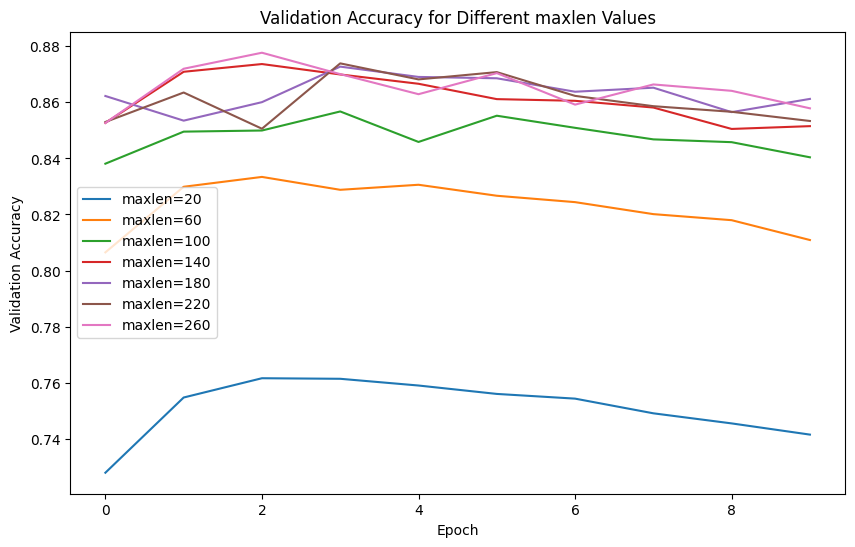

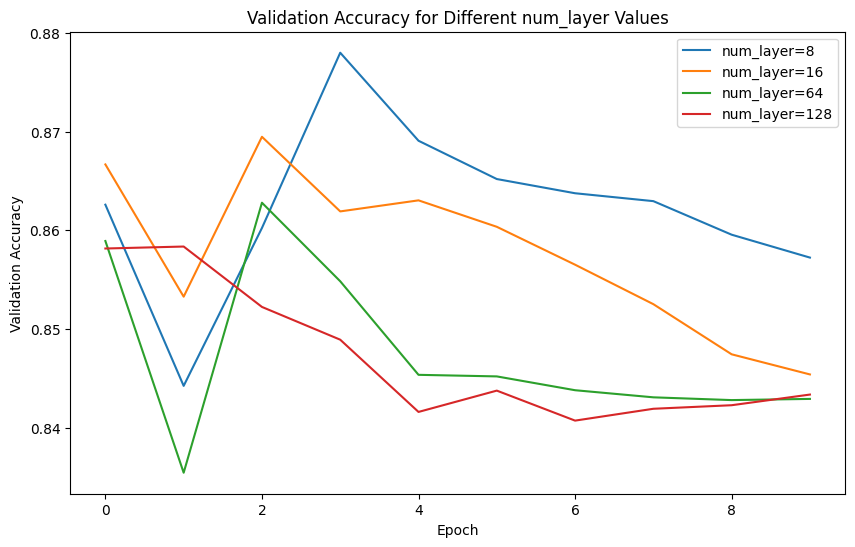

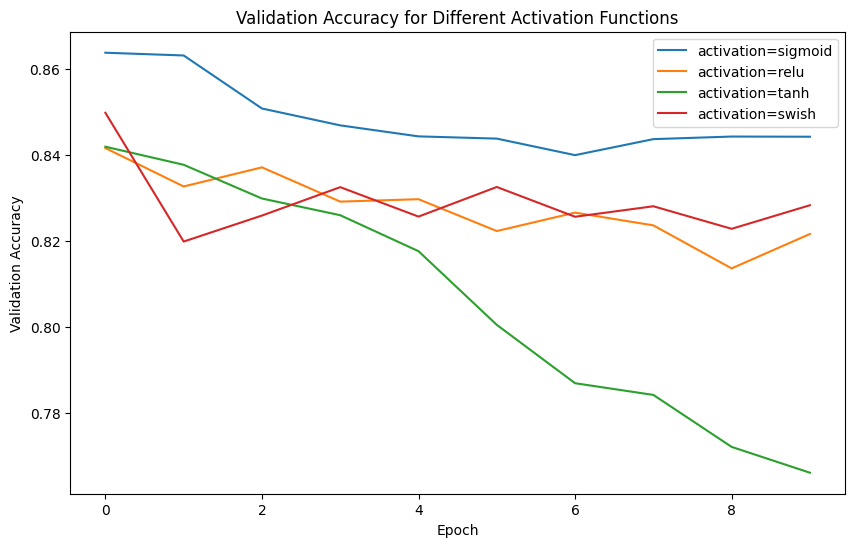

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.datasets import imdb
from keras import preprocessing
import numpy as np

# 1. Varying maxlen and documenting validation performance

import matplotlib.pyplot as plt

max_features = 10000
maxlen_values = [20, 60, 100, 140, 180, 220, 260]
num_layer = 8
results_maxlen = {}

for maxlen in maxlen_values:
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
    x_train_pad = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test_pad = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
    
    model = Sequential()
    model.add(Embedding(max_features, num_layer, input_length=maxlen))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train_pad, y_train, epochs=10, batch_size=12, validation_data=(x_test_pad, y_test), verbose=0)
    results_maxlen[maxlen] = history.history['val_acc']

# Plotting validation accuracy for different maxlen values
plt.figure(figsize=(10,6))
for maxlen in maxlen_values:
    plt.plot(results_maxlen[maxlen], label=f'maxlen={maxlen}')
plt.title('Validation Accuracy for Different maxlen Values')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# 2. Varying num_layer and documenting validation performance

num_layer_values = [8, 16, 64, 128]
maxlen_best = max(maxlen_values, key=lambda ml: results_maxlen[ml][-1])  # Choose maxlen with best last val_acc
results_num_layer = {}

for num_layer in num_layer_values:
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
    x_train_pad = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen_best)
    x_test_pad = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen_best)
    
    model = Sequential()
    model.add(Embedding(max_features, num_layer, input_length=maxlen_best))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train_pad, y_train, epochs=10, batch_size=12, validation_data=(x_test_pad, y_test), verbose=0)
    results_num_layer[num_layer] = history.history['val_acc']

plt.figure(figsize=(10,6))
for num_layer in num_layer_values:
    plt.plot(results_num_layer[num_layer], label=f'num_layer={num_layer}')
plt.title('Validation Accuracy for Different num_layer Values')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# 3. Comparing activation functions

activation_functions = ['sigmoid', 'relu', 'tanh', 'swish']  # swish is a modern activation
results_activation = {}

for activation in activation_functions:
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
    x_train_pad = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen_best)
    x_test_pad = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen_best)
    
    model = Sequential()
    model.add(Embedding(max_features, num_layer_values[-1], input_length=maxlen_best))
    model.add(Flatten())
    model.add(Dense(1, activation=activation))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(x_train_pad, y_train, epochs=10, batch_size=12, validation_data=(x_test_pad, y_test), verbose=0)
    results_activation[activation] = history.history['val_acc']

plt.figure(figsize=(10,6))
for activation in activation_functions:
    plt.plot(results_activation[activation], label=f'activation={activation}')
plt.title('Validation Accuracy for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()



In [5]:
# Summarize the best performing hyperparameters from the experiments

# 1. Best maxlen (sequence length)
best_maxlen = max(results_maxlen, key=lambda ml: results_maxlen[ml][-1])
best_maxlen_acc = results_maxlen[best_maxlen][-1]

# 2. Best num_layer (embedding dimension)
best_num_layer = max(results_num_layer, key=lambda nl: results_num_layer[nl][-1])
best_num_layer_acc = results_num_layer[best_num_layer][-1]

# 3. Best activation function
best_activation = max(results_activation, key=lambda act: results_activation[act][-1])
best_activation_acc = results_activation[best_activation][-1]

print(f"Best maxlen: {best_maxlen} (Validation accuracy: {best_maxlen_acc:.4f})")
print(f"Best num_layer: {best_num_layer} (Validation accuracy: {best_num_layer_acc:.4f})")
print(f"Best activation function: {best_activation} (Validation accuracy: {best_activation_acc:.4f})")

Best maxlen: 180 (Validation accuracy: 0.8612)
Best num_layer: 8 (Validation accuracy: 0.8572)
Best activation function: sigmoid (Validation accuracy: 0.8442)


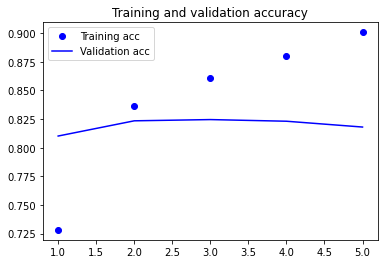

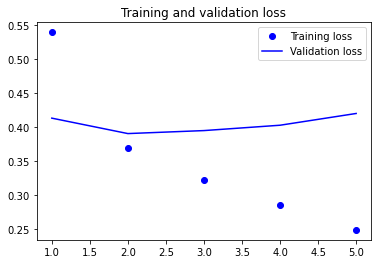

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()